~~~
Copyright 2025 Google LLC

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

    https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.
~~~

# Quick start with Hugging Face

<table><tbody><tr>
  <td style="text-align: center">
    <a href="https://colab.research.google.com/github/google-health/medgemma/blob/main/notebooks/quick_start_with_hugging_face.ipynb">
      <img alt="Google Colab logo" src="https://www.tensorflow.org/images/colab_logo_32px.png" width="32px"><br> Run in Google Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://console.cloud.google.com/vertex-ai/colab/import/https:%2F%2Fraw.githubusercontent.com%2Fgoogle-health%2Fmedgemma%2Fmain%2Fnotebooks%2Fquick_start_with_hugging_face.ipynb">
      <img alt="Google Cloud Colab Enterprise logo" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" width="32px"><br> Run in Colab Enterprise
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://github.com/google-health/medgemma/blob/main/notebooks/quick_start_with_hugging_face.ipynb">
      <img alt="GitHub logo" src="https://github.githubassets.com/assets/GitHub-Mark-ea2971cee799.png" width="32px"><br> View on GitHub
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://huggingface.co/collections/google/medgemma-release-680aade845f90bec6a3f60c4">
      <img alt="Hugging Face logo" src="https://huggingface.co/front/assets/huggingface_logo-noborder.svg" width="32px"><br> View on Hugging Face
    </a>
  </td>
</tr></tbody></table>

This notebook provides a basic demo of using MedGemma, a collection of Gemma 3 variants that are trained for performance on medical text and image comprehension. MedGemma is intended to accelerate building healthcare-based AI applications.

Learn more about the model at the [HAI-DEF developer site](https://developers.google.com/health-ai-developer-foundations/medgemma).

## Setup

To complete this tutorial, you'll need to have a runtime with [sufficient resources](https://ai.google.dev/gemma/docs/core#sizes) to run the MedGemma model.

You can try out MedGemma 4B for free in Google Colab using a T4 GPU:

1. In the upper-right of the Colab window, select **▾ (Additional connection options)**.
2. Select **Change runtime type**.
3. Under **Hardware accelerator**, select **T4 GPU**.

**Note**: To run the demo with MedGemma 27B in Google Colab, you will need a runtime with an A100 GPU and use 4-bit quantization to reduce memory usage. The performance of quantized versions has not been evaluated.

### Get access to MedGemma

Before you get started, make sure that you have access to MedGemma models on Hugging Face:

1. If you don't already have a Hugging Face account, you can create one for free by clicking [here](https://huggingface.co/join).
2. Head over to the [MedGemma model page](https://huggingface.co/google/medgemma-4b-it) and accept the usage conditions.

### Authenticate with Hugging Face

Generate a Hugging Face `read` access token by going to [settings](https://huggingface.co/settings/tokens).

If you are using Google Colab, add your access token to the Colab Secrets manager to securely store it. If not, proceed to run the cell below to authenticate with Hugging Face.

1. Open your Google Colab notebook and click on the 🔑 Secrets tab in the left panel. <img src="https://storage.googleapis.com/generativeai-downloads/images/secrets.jpg" alt="The Secrets tab is found on the left panel." width=50%>
2. Create a new secret with the name `HF_TOKEN`.
3. Copy/paste your token key into the Value input box of `HF_TOKEN`.
4. Toggle the button on the left to allow notebook access to the secret.

In [1]:
import os
import sys

google_colab = "google.colab" in sys.modules and not os.environ.get("VERTEX_PRODUCT")

if google_colab:
    # Use secret if running in Google Colab
    from google.colab import userdata
    os.environ["HF_TOKEN"] = userdata.get("HF_TOKEN")
else:
    # Store Hugging Face data under `/content` if running in Colab Enterprise
    if os.environ.get("VERTEX_PRODUCT") == "COLAB_ENTERPRISE":
        os.environ["HF_HOME"] = "/content/hf"
    # Authenticate with Hugging Face
    from huggingface_hub import get_token
    if get_token() is None:
        from huggingface_hub import notebook_login
        notebook_login()

### Install dependencies

In [2]:
! pip install --upgrade --quiet accelerate bitsandbytes transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.9/72.9 MB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 33.7 MB/s eta 0:00:00


## Load model from Hugging Face Hub

In [4]:
from transformers import BitsAndBytesConfig
import torch

model_variant = "4b-it"  # @param ["4b-it", "27b-it", "27b-text-it"]
model_id = f"google/medgemma-{model_variant}"

use_quantization = False  # @param {type: "boolean"}

# @markdown Set `is_thinking` to `True` to turn on thinking mode. **Note:** Thinking is supported for the 27B variants only.
is_thinking = False  # @param {type: "boolean"}

# If running a 27B variant in Google Colab, check if the runtime satisfies
# memory requirements
if "27b" in model_variant and google_colab:
    if not ("A100" in torch.cuda.get_device_name(0) and use_quantization):
        raise ValueError(
            "Runtime has insufficient memory to run a 27B variant. "
            "Please select an A100 GPU and use 4-bit quantization."
        )

model_kwargs = dict(
    torch_dtype=torch.bfloat16,
    device_map="auto",
)

if use_quantization:
    model_kwargs["quantization_config"] = BitsAndBytesConfig(load_in_4bit=True)

The following sections contain standalone examples demonstrating how to use the model both directly and with the [`pipeline`](https://huggingface.co/docs/transformers/en/main_classes/pipelines) API. The `pipeline` API provides a simple way to use the model for inference while abstracting away complex details,  while directly using the model gives you complete control over the inference process, including preprocessing and postprocessing. In practice, you should select the method that is best suited for your use case.

Here, you will load the model directly and with the `pipeline` API for use in the next sections. Note that the multimodal variants and the 27B text-only variant are loaded with their respective tasks and classes.

**Load model with the `pipeline` API**

In [5]:
from transformers import pipeline

if "text" in model_variant:
    pipe = pipeline("text-generation", model=model_id, model_kwargs=model_kwargs)
else:
    pipe = pipeline("image-text-to-text", model=model_id, model_kwargs=model_kwargs)

pipe.model.generation_config.do_sample = False

config.json:   0%|          | 0.00/2.47k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/90.6k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/3.64G [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/156 [00:00<?, ?B/s]

processor_config.json:   0%|          | 0.00/70.0 [00:00<?, ?B/s]

chat_template.jinja:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/4.69M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/33.4M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

Device set to use cuda:0


**Load model directly**

In [ ]:
if "text" in model_variant:
    from transformers import AutoModelForCausalLM, AutoTokenizer
    model = AutoModelForCausalLM.from_pretrained(model_id, **model_kwargs)
    tokenizer = AutoTokenizer.from_pretrained(model_id)
else:
    from transformers import AutoModelForImageTextToText, AutoProcessor
    model = AutoModelForImageTextToText.from_pretrained(model_id, **model_kwargs)
    processor = AutoProcessor.from_pretrained(model_id)

## Run inference on images and text

This section demonstrates running inference on image-based tasks using multimodal variants.

**Note:** Proceed to [Run inference on text only](#scrollTo=tcyXG4lTpY4X) if you have selected the 27B text-only variant.

In [6]:
if "text" in model_variant:
    raise ValueError(
        "You are using a text-only variant which does not support multimodal "
        "inputs. Please proceed to the 'Run inference on text only' section."
    )

**Specify image and text inputs**

In [7]:
import os
from PIL import Image
from IPython.display import Image as IPImage, display, Markdown

prompt = "Describi esta X-ray"  # @param {type: "string"}

# Image attribution: Stillwaterising, CC0, via Wikimedia Commons
image_url = "https://upload.wikimedia.org/wikipedia/commons/0/0c/X-ray_of_rib_fractures_and_pneumothorax.jpg"  # @param {type: "string"}
! wget -nc -q {image_url}
image_filename = os.path.basename(image_url)
image = Image.open(image_filename)

**Format conversation**

In [8]:
role_instruction = "Eres un experto en radiologia."
if "27b" in model_variant and is_thinking:
    system_instruction = f"SYSTEM INSTRUCTION: think silently if needed. {role_instruction}"
    max_new_tokens = 1300
else:
    system_instruction = role_instruction
    max_new_tokens = 300

messages = [
    {
        "role": "system",
        "content": [{"type": "text", "text": system_instruction}]
    },
    {
        "role": "user",
        "content": [
            {"type": "text", "text": prompt},
            {"type": "image", "image": image}
        ]
    }
]

**Run model with the `pipeline` API**

---

**[ User ]**

Describi esta X-ray

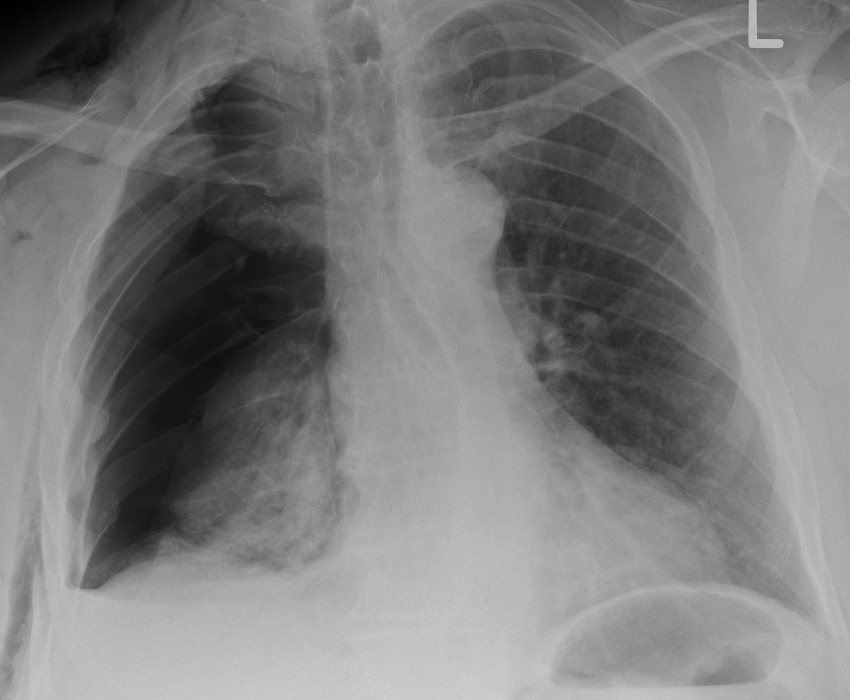

---

**[ MedGemma ]**

De acuerdo, como experto en radiología, puedo describir la radiografía que me has proporcionado.

**Hallazgos principales:**

*   **Opacidades en el lóbulo inferior derecho:** La principal observación es la presencia de opacidades significativas en el lóbulo inferior derecho. Estas opacidades pueden ser causadas por una variedad de condiciones, incluyendo:
    *   **Infección:** Neumonía, bronquitis, o incluso una infección localizada en el pulmón.
    *   **Hinchazón:** Edema pulmonar, que puede ser causado por insuficiencia cardíaca, embolia pulmonar, o otras condiciones que afectan el flujo sanguíneo pulmonar.
    *   **Coágulo sanguíneo:** Un coágulo en una arteria pulmonar (embolia pulmonar).
    *   **Tumor:** Aunque menos probable, un tumor pulmonar también podría causar opacidades.
    *   **Hemorragia:** Sangrado en el pulmón.
*   **Posible derrame pleural:** Se observa una zona de opacidad en la base del pulmón derecho, que podría indicar un derrame pleural (acumulación de líquido en el espacio entre el pulmón y la pared torácica).
*   **Pulmón izquierdo relativamente claro:** El pulmón izquierdo parece más claro que el derecho, lo que podría sugerir una mejor ventilación o una condición menos grave en

---

In [9]:
output = pipe(text=messages, max_new_tokens=max_new_tokens)
response = output[0]["generated_text"][-1]["content"]

display(Markdown(f"---\n\n**[ User ]**\n\n{prompt}"))
display(IPImage(filename=image_filename, height=300))
if "27b" in model_variant and is_thinking:
    thought, response = response.split("<unused95>")
    thought = thought.replace("<unused94>thought\n", "")
    display(Markdown(f"---\n\n**[ MedGemma thinking ]**\n\n{thought}"))
display(Markdown(f"---\n\n**[ MedGemma ]**\n\n{response}\n\n---"))

**Run the model directly**

In [10]:
inputs = processor.apply_chat_template(
    messages,
    add_generation_prompt=True,
    tokenize=True,
    return_dict=True,
    return_tensors="pt",
).to(model.device, dtype=torch.bfloat16)

input_len = inputs["input_ids"].shape[-1]

with torch.inference_mode():
    generation = model.generate(**inputs, max_new_tokens=max_new_tokens, do_sample=False)
    generation = generation[0][input_len:]

response = processor.decode(generation, skip_special_tokens=True)

display(Markdown(f"---\n\n**[ User ]**\n\n{prompt}"))
display(IPImage(filename=image_filename, height=300))
if "27b" in model_variant and is_thinking:
    thought, response = response.split("<unused95>")
    thought = thought.replace("<unused94>thought\n", "")
    display(Markdown(f"---\n\n**[ MedGemma thinking ]**\n\n{thought}"))
display(Markdown(f"---\n\n**[ MedGemma ]**\n\n{response}\n\n---"))

NameError: name 'processor' is not defined

## Run inference on text only

This section demonstrates running inference on text-based tasks.

**Specify text prompt and format conversation**

In [ ]:
from IPython.display import Markdown

prompt = "How do you differentiate bacterial from viral pneumonia?"  # @param {type: "string"}

role_instruction = "You are a helpful medical assistant."
if "27b" in model_variant and is_thinking:
    system_instruction = f"SYSTEM INSTRUCTION: think silently if needed. {role_instruction}"
    max_new_tokens = 1500
else:
    system_instruction = role_instruction
    max_new_tokens = 500

messages = [
    {
        "role": "system",
        "content": [{"type": "text", "text": system_instruction}]
    },
    {
        "role": "user",
        "content": [{"type": "text", "text": prompt}]
    }
]

**Run model with the `pipeline` API**

In [ ]:
output = pipe(messages, max_new_tokens=max_new_tokens)
response = output[0]["generated_text"][-1]["content"]

display(Markdown(f"---\n\n**[ User ]**\n\n{prompt}\n\n---"))
if "27b" in model_variant and is_thinking:
    thought, response = response.split("<unused95>")
    thought = thought.replace("<unused94>thought\n", "")
    display(Markdown(f"**[ MedGemma thinking ]**\n\n{thought}\n\n---"))
display(Markdown(f"**[ MedGemma ]**\n\n{response}\n\n---"))

---

**[ User ]**

How do you differentiate bacterial from viral pneumonia?

---

**[ MedGemma ]**

Okay, I can explain the key differences between bacterial and viral pneumonia. As a medical assistant, I understand that this is a crucial distinction because the treatment strategies differ significantly. While a definitive diagnosis often requires lab tests, clinical presentation and history can provide strong clues.

Here's a breakdown of how we typically differentiate between the two:

**1. Onset & Symptoms:**

*   **Bacterial Pneumonia:**
    *   **Onset:** Often **sudden and abrupt**. Patients might feel fine one day and acutely ill the next.
    *   **Symptoms:**
        *   High fever (often > 102°F / 39°C).
        *   Shaking chills.
        *   Productive cough: Coughing up thick, often colored (yellow, green, rust-colored) sputum.
        *   Sharp, stabbing pleuritic chest pain (pain that worsens with deep breaths or coughing).
        *   Rapid breathing (tachypnea) and shortness of breath.
        *   Fatigue and malaise.
        *   May experience sweating.
        *   Sometimes confusion (especially in older adults).

*   **Viral Pneumonia:**
    *   **Onset:** Usually **gradual**, often starting with cold-like symptoms that progress over several days.
    *   **Symptoms:**
        *   Lower-grade fever (though it can sometimes be high).
        *   Dry, non-productive cough (hacking cough, may produce small amounts of clear or whitish mucus).
        *   Muscle aches (myalgia) and headache.
        *   Sore throat.
        *   General feeling of being unwell (malaise).
        *   Shortness of breath, but often less severe initially than bacterial.
        *   Chest discomfort may be present but is often less sharp or localized than pleuritic pain.
        *   Wheezing can sometimes occur.

**2. Patient History & Risk Factors:**

*   **Bacterial Pneumonia:**
    *   Often follows a recent upper respiratory infection (like a cold or flu) that worsens or doesn't improve.
    *   More common in individuals with underlying chronic health conditions (COPD, heart disease, diabetes, kidney disease), weakened immune systems (due to illness, medications like steroids, or chemotherapy), smokers, and older adults.
    *   Hospital

---

**Run the model directly**

In [ ]:
processor_or_tokenizer = tokenizer if "text" in model_variant else processor

inputs = processor_or_tokenizer.apply_chat_template(
    messages,
    add_generation_prompt=True,
    tokenize=True,
    return_dict=True,
    return_tensors="pt",
).to(model.device)

input_len = inputs["input_ids"].shape[-1]

with torch.inference_mode():
    generation = model.generate(**inputs, max_new_tokens=max_new_tokens, do_sample=False)
    generation = generation[0][input_len:]

response = processor_or_tokenizer.decode(generation, skip_special_tokens=True)

display(Markdown(f"---\n\n**[ User ]**\n\n{prompt}\n\n---"))
if "27b" in model_variant and is_thinking:
    thought, response = response.split("<unused95>")
    thought = thought.replace("<unused94>thought\n", "")
    display(Markdown(f"**[ MedGemma thinking ]**\n\n{thought}\n\n---"))
display(Markdown(f"**[ MedGemma ]**\n\n{response}\n\n---"))

---

**[ User ]**

How do you differentiate bacterial from viral pneumonia?

---

**[ MedGemma ]**

Okay, let's break down how healthcare professionals differentiate between bacterial and viral pneumonia. It's important to remember that I'm an AI and cannot provide medical advice. This information is for educational purposes only. A definitive diagnosis always requires a healthcare professional.

Differentiating bacterial and viral pneumonia can be tricky because symptoms often overlap. However, there are key differences in presentation, history, and diagnostic tests that help clinicians distinguish between them.

Here's a breakdown of the key differentiating factors:

**1. Clinical Presentation & History:**

*   **Onset:**
    *   **Bacterial:** Often sudden and abrupt onset. Patients may feel fine one day and severely ill the next.
    *   **Viral:** Typically more gradual onset, often starting with cold-like symptoms (runny nose, cough, sore throat) that then progress to pneumonia symptoms.
*   **Symptoms:**
    *   **Bacterial:** High fever (often >102°F / 39°C), shaking chills, productive cough (producing thick, often colored sputum - yellow, green, rust-colored), shortness of breath, chest pain (often sharp, pleuritic - worse with breathing).
    *   **Viral:** Lower-grade fever (though can be high), dry cough (less likely to produce thick sputum), muscle aches (myalgia), headache, fatigue, sore throat. Shortness of breath can occur but might be less severe initially than in bacterial pneumonia.
*   **Patient History:**
    *   **Bacterial:** Less likely to have preceding upper respiratory infection (URI) symptoms. May have underlying conditions like COPD, heart failure, diabetes, or be immunocompromised.
    *   **Viral:** Often preceded by URI symptoms. More common in younger children and older adults. Can occur in outbreaks (e.g., influenza season).

**2. Physical Examination:**

*   **Lung Sounds:**
    *   **Bacterial:** Often localized findings. Crackles (rales), rhonchi, or decreased breath sounds over the affected area.
    *   **Viral:** Lung sounds might be more diffuse (spread throughout) or relatively normal, especially early on. Wheezing can sometimes be present.
*   **General Appearance:**
    *   **Bacterial:** Patients often appear more acutely ill, toxic-looking.
    *   **Viral:** Patients might appear less acutely ill initially,

---

# Next steps

Explore the other [notebooks](https://github.com/google-health/medgemma/blob/main/notebooks) to learn what else you can do with the model.